In [46]:
import pandas as pd 
reviews = pd.read_csv("reviews_restaurant_indexed_clusters.csv") 
reviews.head()

review_id                 user_id  userId  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA       0   
1  VJxlBnJmCDIy8DFG0kjSow  Iaee7y6zdSB3B-kRCo4z1w       1   
2  S6pQZQocMB1WHMjTRbt77A  ejFxLGqQcWNLdNByJlIhnQ       2   
3  WqgTKVqWVHDHjnjEsBvUgg  f7xa0p_1V9lx53iIGN5Sug       3   
4  M0wzFFb7pefOPcxeRVbLag  dCooFVCk8M1nVaQqcfTL3Q       4   

              business_id  resId  rating   latitude  longitude  \
0  XQfwVwDr-v0ZS3_CbbE5Xw      0     3.0  40.210196 -75.223639   
1  XQfwVwDr-v0ZS3_CbbE5Xw      0     2.0  40.210196 -75.223639   
2  XQfwVwDr-v0ZS3_CbbE5Xw      0     4.0  40.210196 -75.223639   
3  XQfwVwDr-v0ZS3_CbbE5Xw      0     3.0  40.210196 -75.223639   
4  XQfwVwDr-v0ZS3_CbbE5Xw      0     2.0  40.210196 -75.223639   

                  business_name  cluster           cluster_name  time  \
0  Turning Point of North Wales        0  Philadelphia, PA Area     0   
1  Turning Point of North Wales        0  Philadelphia, PA Area     0   
2  Turning Point of North Wales        0  Philadelphia, PA Area     2   
3  Turning Point of North Wales        0  Philadelphia, PA Area     0   
4  Turning Point of North Wales        0  Philadelphia, PA Area     0   

   service  food  
0        0     2  
1        0     1  
2        2     2  
3        0     0  
4        0     1

In [47]:
reviews.groupby('cluster_name')['business_id'].nunique() # count of businesses by cluster, I chose a user in a smaller cluster to speed up sentiment prediction

cluster_name
Boise, ID Area            1747
Edmonton, CN Area         3057
Indianapolis, IN Area     5278
Los Angeles, CA Area      1646
Nashville Area            5476
New Orleans, LA Area      4857
Philadelphia, PA Area    21173
Reno, NV Area             2400
St Louis, Area            6485
Tampa Bay, FL Area       11268
Tucson, AZ Area           3457
Name: business_id, dtype: int64

In [107]:
# I filtered for users in NOLA b/c it's a smaller cluster, to speed up sentiment prediction
CLUSTER = 'Nashville Area'
reviews[reviews.cluster_name == CLUSTER].groupby('user_id').count().sort_values(by='review_id', ascending=False)

review_id  userId  business_id  resId  rating  \
user_id                                                                 
h7p-GuaHFGsiKCF4g6Bjqg        508     508          508    508     508   
cufhYFdyrUAt4SWe-m0grQ        496     496          496    496     496   
2XKlUjHGk9z-2ckFMcBEHw        449     449          449    449     449   
zF10BKjK4Lz9U_8Yqw28ww        433     433          433    433     433   
Kho08pWNfeGnRbZTnMKy3w        347     347          347    347     347   
...                           ...     ...          ...    ...     ...   
UxKQ1aqpuDfpoR3y9eV2Pw          1       1            1      1       1   
UxJ3E1c-OxlAicL0jgPAGg          1       1            1      1       1   
UxFvZH_EfhC6qyUMLikS-Q          1       1            1      1       1   
72jyd5wMZj_mJ7MGu6yeOA          1       1            1      1       1   
--2PnhMMH7EYoY3wywOvgQ          1       1            1      1       1   

                        latitude  longitude  business_name  cluster  \
user_id                                                               
h7p-GuaHFGsiKCF4g6Bjqg       508        508            508      508   
cufhYFdyrUAt4SWe-m0grQ       496        496            496      496   
2XKlUjHGk9z-2ckFMcBEHw       449        449            449      449   
zF10BKjK4Lz9U_8Yqw28ww       433        433            433      433   
Kho08pWNfeGnRbZTnMKy3w       347        347            347      347   
...                          ...        ...            ...      ...   
UxKQ1aqpuDfpoR3y9eV2Pw         1          1              1        1   
UxJ3E1c-OxlAicL0jgPAGg         1          1              1        1   
UxFvZH_EfhC6qyUMLikS-Q         1          1              1        1   
72jyd5wMZj_mJ7MGu6yeOA         1          1              1        1   
--2PnhMMH7EYoY3wywOvgQ         1          1              1        1   

                        cluster_name  time  service  food  
user_id                                                    
h7p-GuaHFGsiKCF4g6Bjqg           508   508      508   508  
cufhYFdyrUAt4SWe-m0grQ           496   496      496   496  
2XKlUjHGk9z-2ckFMcBEHw           449   449      449   449  
zF10BKjK4Lz9U_8Yqw28ww           433   433      433   433  
Kho08pWNfeGnRbZTnMKy3w           347   347      347   347  
...                              ...   ...      ...   ...  
UxKQ1aqpuDfpoR3y9eV2Pw             1     1        1     1  
UxJ3E1c-OxlAicL0jgPAGg             1     1        1     1  
UxFvZH_EfhC6qyUMLikS-Q             1     1        1     1  
72jyd5wMZj_mJ7MGu6yeOA             1     1        1     1  
--2PnhMMH7EYoY3wywOvgQ             1     1        1     1  

[178283 rows x 13 columns]

In [94]:
## choose a specific user from above
TEST_USER = 'zF10BKjK4Lz9U_8Yqw28ww'
actual_user_reviews = reviews[reviews.user_id == TEST_USER] \
    .sort_values(['rating','business_id'], ascending=[False, True])
actual_user_reviews[['business_id', 'business_name', 'rating', 'cluster_name']]

business_id  \
4488908  08kVZ7eYC9NGn6njjsRkQA   
4408332  4HE6POeYQtB_k6ziyRoqlg   
4436253  4TDMSTCQuj8F0WjxJWOkGA   
4535932  8ieaL8k18G4B9cFNvOZjTg   
4265891  Mud5k_Un5mkQgOPU55UGwQ   
...                         ...   
4263162  FszFxgcs7S8Hl2zlzw3YNg   
4380415  K3t9JDcutfnkivCOL-fMrA   
4174348  YdMKdHOPbNgzxrC7xFwL1Q   
4366315  aDgughL1vDootnXe5kUWGQ   
4215699  f_GIv3cHcyXGxEPXRJ2eCQ   

                                             business_name  rating  \
4488908                                             Tànsuŏ     5.0   
4408332                                 Nashville Jam Café     5.0   
4436253  McDougal's Chicken Fingers & Wings-West Nashville     5.0   
4535932                                  The Produce Place     5.0   
4265891                                  El Hornito Bakery     5.0   
...                                                    ...     ...   
4263162                                          Rosario's     1.0   
4380415                            Another Broken Egg Cafe     1.0   
4174348                                          Starbucks     1.0   
4366315                                        Otaku Ramen     1.0   
4215699                                       Lucky Bamboo     1.0   

           cluster_name  
4488908  Nashville Area  
4408332  Nashville Area  
4436253  Nashville Area  
4535932  Nashville Area  
4265891  Nashville Area  
...                 ...  
4263162  Nashville Area  
4380415  Nashville Area  
4174348  Nashville Area  
4366315  Nashville Area  
4215699  Nashville Area  

[433 rows x 4 columns]

### Implement "generate recs" function from app

In [5]:
from helper import data_prep
from models import get_mf_preds, get_senti_preds, MF, CollabFNet, train_epocs
import time

In [108]:
## CHANGE USER CLUSTER AND SELECTION BASED ON TESTING USER
user_cluster = CLUSTER
user_selection = [
        {"name": "Tànsuŏ", "food": "5", "time": "5", "service": "5"},
        {"name": "Nashville Jam Café", "food": "5", "time": "5", "service": "5"},
        {"name": "McDougal's Chicken Fingers & Wings-West Nashville", "food": "5", "time": "5", "service": "5"},
    ] 
## filter out user in model training
reviews_filtered = reviews[reviews.user_id != TEST_USER]

In [109]:
start = time.time()
train_data, new_user, res_ids_in_cluster, senti_user_list, senti_item_list, senti_ratings_list, bus_ids_in_cluster = \
    data_prep(reviews_data = reviews_filtered, user_cluster=user_cluster, user_selection=user_selection) 
stop = time.time()
print("Data prep took: ", stop - start, " seconds") 

/Users/stevezheng/Desktop/OMSA/Fall 2024/Project/dva-yelp/app/helper.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti_data['time'] = senti_data['time'] * 2 + 1
/Users/stevezheng/Desktop/OMSA/Fall 2024/Project/dva-yelp/app/helper.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti_data['service'] = senti_data['service'] * 2 + 1
/Users/stevezheng/Desktop/OMSA/Fall 2024/Project/dva-yelp/app/helper.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Data prep took:  15.003633975982666  seconds


In [110]:
num_users = len(train_data.userId.unique())
num_items = len(train_data.resId.unique())
num_users, num_items

(1522785, 66844)

In [111]:
## MF PREDICTIONS ##
start = time.time()
model = CollabFNet(num_users, num_items, emb_size=100) 
train_epocs(model, train_data, epochs=15, lr=.05, wd=1e-6, unsqueeze=True) ## best model from testing
new_user = new_user - 1 ## decrement by 1 b/c we removed the user from training
mf_preds = model(new_user, res_ids_in_cluster) ## predict on user for restaurants in cluster
stop = time.time()
print("MF model took: ", stop - start, " seconds") 

MF model took:  265.96525478363037  seconds


### Compare MF model to actual ratings (ignore sentiment model for this part, later section includes both)

In [112]:
mf_preds_df = pd.DataFrame({
    'resId': res_ids_in_cluster.tolist(),
    'mf_pred': list(mf_preds.detach().numpy().reshape(-1))
})    

In [113]:
mf_preds_output = mf_preds_df.merge(reviews[['resId', 'business_id', 'business_name']].drop_duplicates())
compare = mf_preds_output.merge(actual_user_reviews[['business_id', 'rating']], on='business_id').sort_values(by='mf_pred', ascending=False)
compare

resId   mf_pred             business_id  \
393  30976  5.308344  fPLjV6Is1_8Av86CAwwgKQ   
311  60862  5.191480  0F9JFISZW9ErjOrqK-mnIw   
184   7111  5.022279  Gi4ex2Tq7ggRlpN0S7k5Xg   
12     196  4.980804  VRGYwKE_Z77frm5NwLvJhw   
376  30466  4.877090  X85AplVLxxc7LRlM7QmwuA   
..     ...       ...                     ...   
339  28852  2.537268  rrrOJ_vYXuQaouyLZROThQ   
197   7352  2.499777  KnsY8rh5tigp5t6WpilGdA   
257   9118  2.489982  1hjKZ2GhYVg4mwPirC_Myw   
109  20545  2.431462  SAp1Nk3XLbQ-zeJKyASICQ   
112  37021  2.413334  MtCiGn5egsWHFRP1YMvrJw   

                               business_name  rating  
393  Zaxby's Chicken Fingers & Buffalo Wings     4.0  
311                      Pied Piper Creamery     4.0  
184               Jeni's Splendid Ice Creams     4.0  
12                           Burger Republic     4.0  
376                                Starbucks     4.0  
..                                       ...     ...  
339               Raffertys Restaurant & Bar     3.0  
197           Whole Foods Market - Nashville     3.0  
257                                   La Paz     3.0  
109       The Cheesecake Factory - Nashville     4.0  
112                                   Publix     4.0  

[430 rows x 5 columns]

In [114]:
compare

resId   mf_pred             business_id  \
393  30976  5.308344  fPLjV6Is1_8Av86CAwwgKQ   
311  60862  5.191480  0F9JFISZW9ErjOrqK-mnIw   
184   7111  5.022279  Gi4ex2Tq7ggRlpN0S7k5Xg   
12     196  4.980804  VRGYwKE_Z77frm5NwLvJhw   
376  30466  4.877090  X85AplVLxxc7LRlM7QmwuA   
..     ...       ...                     ...   
339  28852  2.537268  rrrOJ_vYXuQaouyLZROThQ   
197   7352  2.499777  KnsY8rh5tigp5t6WpilGdA   
257   9118  2.489982  1hjKZ2GhYVg4mwPirC_Myw   
109  20545  2.431462  SAp1Nk3XLbQ-zeJKyASICQ   
112  37021  2.413334  MtCiGn5egsWHFRP1YMvrJw   

                               business_name  rating  
393  Zaxby's Chicken Fingers & Buffalo Wings     4.0  
311                      Pied Piper Creamery     4.0  
184               Jeni's Splendid Ice Creams     4.0  
12                           Burger Republic     4.0  
376                                Starbucks     4.0  
..                                       ...     ...  
339               Raffertys Restaurant & Bar     3.0  
197           Whole Foods Market - Nashville     3.0  
257                                   La Paz     3.0  
109       The Cheesecake Factory - Nashville     4.0  
112                                   Publix     4.0  

[430 rows x 5 columns]

<Axes: title={'center': 'mf_pred'}, xlabel='[rating]'>

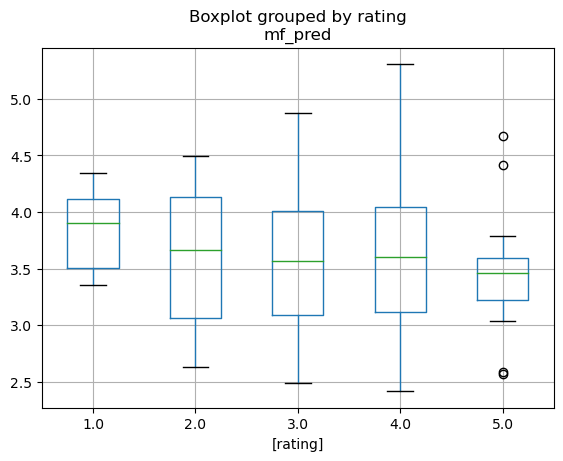

In [115]:
compare[['rating', 'mf_pred']].boxplot(by='rating')

### Compare MF+sentiment model to actual ratings

In [116]:
## SENTI MODEL PREP ##
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csr_matrix
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

encoded_users = user_encoder.fit_transform(senti_user_list)
encoded_items = item_encoder.fit_transform(senti_item_list)

# Define the number of users and items based on unique values
num_users = len(set(encoded_users))
num_items = len(set(encoded_items))

# Create the sparse user-item matrix (CSR format) for efficient slicing
user_item_matrix = csr_matrix(
    (senti_ratings_list, (encoded_users, encoded_items)), shape=(num_users, num_items)
)

# Generate prediction on restaurants in cluster for the new user
user_batch = [new_user[0].item() + 1] * len(bus_ids_in_cluster) # new user list, adding back 1 to account for how senti denote user ids
item_batch = bus_ids_in_cluster  # restaurants in cluster to predict on 

In [117]:
len(user_batch)

5473

In [118]:
## SENTI MODEL INPUTS ##
from helper import torch_sentiment_predict_batch
batch_size = 500
senti_preds = []
# toggle these to make the predictions piecemeal
start_index = 0
end_index = len(user_batch)

In [119]:
## SENTI MODEL PREDICTIONS ##
for i in range(start_index, end_index, batch_size):
    print("Batch from " + str(i) + " to " + str(i + batch_size))
    user_sub_batch = user_batch[i:i + batch_size]
    item_sub_batch = item_batch[i:i + batch_size]
    # Process the current sub-batch and collect predictions
    sub_batch_predictions = torch_sentiment_predict_batch(user_sub_batch, item_sub_batch, user_encoder, item_encoder, user_item_matrix)
    senti_preds = senti_preds + sub_batch_predictions

Batch from 0 to 500
Batch from 500 to 1000
Batch from 1000 to 1500
Batch from 1500 to 2000
Batch from 2000 to 2500
Batch from 2500 to 3000
Batch from 3000 to 3500
Batch from 3500 to 4000
Batch from 4000 to 4500
Batch from 4500 to 5000
Batch from 5000 to 5500


In [120]:
senti_preds_df = pd.DataFrame(senti_preds, columns=['user_id', 'business_id', 'senti_pred'])

In [121]:
# combine MF and senti model preds
BETA = .6
compare_2 = compare.merge(senti_preds_df)
compare_2['combined_pred'] = compare_2['mf_pred'] * BETA + compare_2['senti_pred'] * (1 - BETA)

In [122]:
compare_2[['business_id', 'business_name', 'mf_pred', 'senti_pred', 'combined_pred', 'rating']].sort_values(by='combined_pred', ascending=False)

business_id               business_name   mf_pred  senti_pred  \
2    Gi4ex2Tq7ggRlpN0S7k5Xg  Jeni's Splendid Ice Creams  5.022279    4.945455   
3    VRGYwKE_Z77frm5NwLvJhw             Burger Republic  4.980804    4.944509   
1    0F9JFISZW9ErjOrqK-mnIw         Pied Piper Creamery  5.191480    4.600000   
4    X85AplVLxxc7LRlM7QmwuA                   Starbucks  4.877090    5.000000   
6    pP2Rm4rJyloEQbddwXyV-Q         Bro's Cajun Cuisine  4.869367    5.000000   
..                      ...                         ...       ...         ...   
398  5dn0IVyYJwrkH6xO_Fdd-A                        IHOP  2.797006    0.000000   
401  vXPUbNZqSIWevt2oslzbHA   Zackie's Original Hot Dog  2.773851    0.000000   
417  4Xkpyuk4QQnAK9WBDHdHzg      East Buffet Restaurant  2.604557    0.000000   
422  SvsTD4RG8P0iJChhiblMXg        Katy's Hallmark Shop  2.575736    0.000000   
425  rrrOJ_vYXuQaouyLZROThQ  Raffertys Restaurant & Bar  2.537268    0.000000   

     combined_pred  rating  
2         4.991549     4.0  
3         4.966286     4.0  
1         4.954888     4.0  
4         4.926254     4.0  
6         4.921620     3.0  
..             ...     ...  
398       1.678204     3.0  
401       1.664311     3.0  
417       1.562734     3.0  
422       1.545442     3.0  
425       1.522361     3.0  

[430 rows x 6 columns]

<Axes: title={'center': 'combined_pred'}, xlabel='[rating]'>

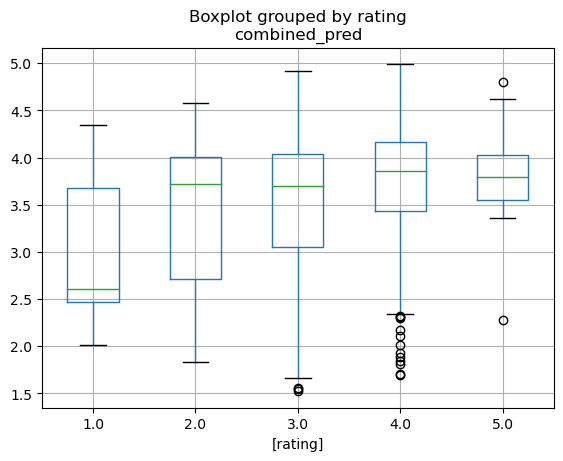

In [123]:
compare_2[['rating', 'combined_pred']].boxplot(by='rating')